模型评估结果：
总体准确率: 0.9277

分类报告:
              precision    recall  f1-score   support

           0     0.9173    0.9395    0.9283       496
           1     0.9385    0.9160    0.9271       500

    accuracy                         0.9277       996
   macro avg     0.9279    0.9278    0.9277       996
weighted avg     0.9280    0.9277    0.9277       996


类别: 0 (negative)
  精确率 (Precision): 0.9173
  召回率 (Recall): 0.9395
  F1 分数 (F1-Score): 0.9283

类别: 1 (positive)
  精确率 (Precision): 0.9385
  召回率 (Recall): 0.9160
  F1 分数 (F1-Score): 0.9271

混淆矩阵：
[[466  30]
 [ 42 458]]


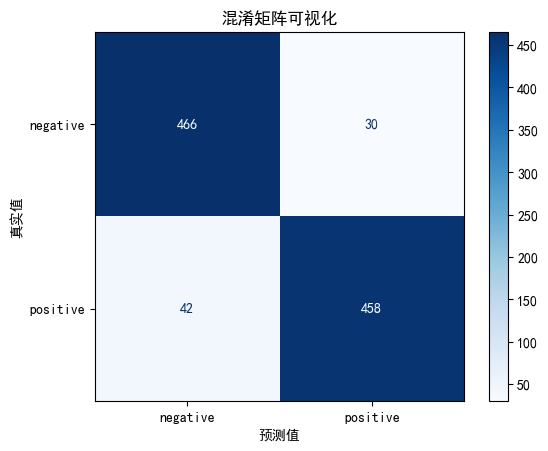

In [8]:
import json
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# 加载 results.json 文件
with open("results.json", "r", encoding="utf-8") as file:
    results = json.load(file)

# 提取预测结果和真实标签
predicted_stances = [item["detected_stance"] for item in results]
true_label = [item["true_label"] for item in results]

# 定义标签类别
categories = [0, 1]  # 0: negative, 1: positive

# 计算准确率
accuracy = accuracy_score(true_label, predicted_stances)

# 计算精确率、召回率和 F1 分数
precision, recall, f1, _ = precision_recall_fscore_support(
    true_label, predicted_stances, labels=categories, average=None
)

# 打印分类报告
report = classification_report(
    true_label, predicted_stances, labels=categories, digits=4
)

# 输出结果
print("模型评估结果：")
print(f"总体准确率: {accuracy:.4f}")
print("\n分类报告:")
print(report)

# 按类别输出精确率、召回率、F1 分数
for i, category in enumerate(categories):
    print(f"\n类别: {category} ({'positive' if category == 1 else 'negative'})")
    print(f"  精确率 (Precision): {precision[i]:.4f}")
    print(f"  召回率 (Recall): {recall[i]:.4f}")
    print(f"  F1 分数 (F1-Score): {f1[i]:.4f}")

# 混淆矩阵
cm = confusion_matrix(true_label, predicted_stances, labels=categories)

# 打印混淆矩阵
print("\n混淆矩阵：")
print(cm)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["negative", "positive"]
)
disp.plot(cmap="Blues")  # 可选配色方案
disp.ax_.set_title("混淆矩阵可视化")
disp.ax_.set_xlabel("预测值")
disp.ax_.set_ylabel("真实值")

# 展示图像
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文字体
plt.show()